## OKCupid Project
Practicing coding with vizualizations, analysis, and machine learning

## Intro

Looking at OKCupid profile data from a dataset provided from Codecademy, how can we visualize, analyze (and hopefully model) some of the trends we see from OKCupid.

#### Data sources:
`profiles.csv` was provided from Codecademy.com 

In [213]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [214]:
cupid = pd.read_csv("profiles.csv")

In [215]:
cupid.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [216]:
cupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

__Data Characteristics/Summary__

`Cupid` has 59,946 rows, 31 columns with a mix of categorical and continuous variables

- Continuous Variables
    - __age, height, income__

- Categorical Variables
    - __body_type, diet, drinks, drugs, education, ethnicity, job, offspring, orientation, pets, religion, sex, sign, smokes, speaks, status, last_online, location__

The data also has 9 essays that include short blurbs about the user
    

## Exploring the Data

One thing I want to see is the percentage of data thats null for each parameter I'm looking at. I want to know how much data I'm dropping, and be able to understand how much of the data is missing per parameter (are people leaving out their drugs information for fear of judgement? or body type for fear of body shaming? etc...)


In [217]:
def percent_null(param):
    total_null_param = cupid[param].isnull().sum()
    total_param = cupid[param].count()
    percent_null = (total_null_param / total_param)
    return round(percent_null*100, 2)


In [218]:
drinks_percent_null = percent_null('drinks')
drugs_percent_null = percent_null('drugs')
smokes_percent_null = percent_null('smokes')
pets_percent_null = percent_null('pets')
zodiac_percent_null = percent_null("sign")

print(drinks_percent_null, drugs_percent_null, smokes_percent_null, pets_percent_null, zodiac_percent_null)

5.24 30.7 10.13 49.77 22.61


- So to quickly summarize, we can see the first few rows of the `Cupid` dataframe, we have some info on the columns and their types, and we have a quick function to see what percent of the columns have missing information. Let's look at the data visually below and try to make some inferences

### Continuous Variables:

From above can see the continuous variables are: __age__, __height__, and __income__

#### Age:

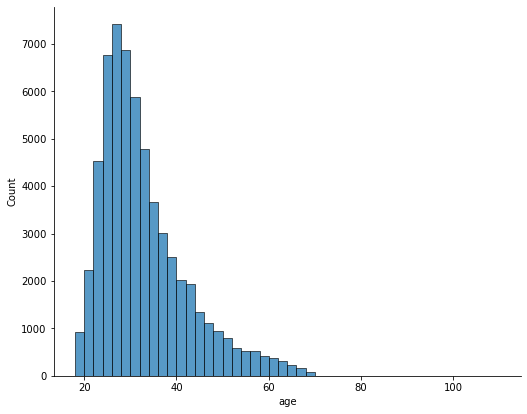

In [219]:
ax = sns.displot(data = cupid, x = 'age', binwidth = 2)
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)


Looks like the average age is around 30. lets see:


In [220]:
median_age = np.median(cupid.age)
mean_age = np.mean(cupid.age)

print("Median age: {}".format(median_age))
print("Average age: {}".format(mean_age))

Median age: 30.0
Average age: 32.3402895939679


Lets see all the data broken down by sex as well:


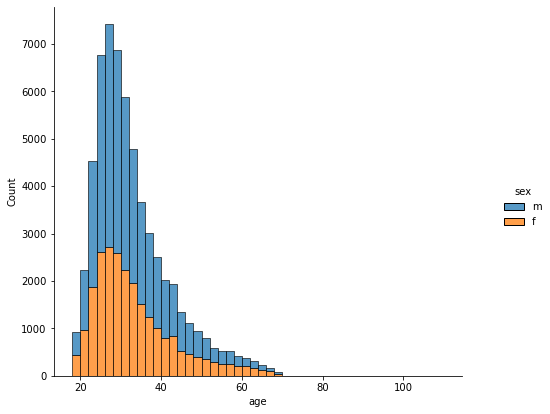

In [221]:
ax = sns.displot(data = cupid, x = 'age', hue = 'sex', binwidth = 2, multiple = 'stack')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)


Looks like distribution between genders is the same.

In [222]:
sex_avg_age = cupid.groupby("sex").age.mean()
print(sex_avg_age)

#confirmed that have basically the same average age

sex
f    32.818220
m    32.018588
Name: age, dtype: float64


#### Height:

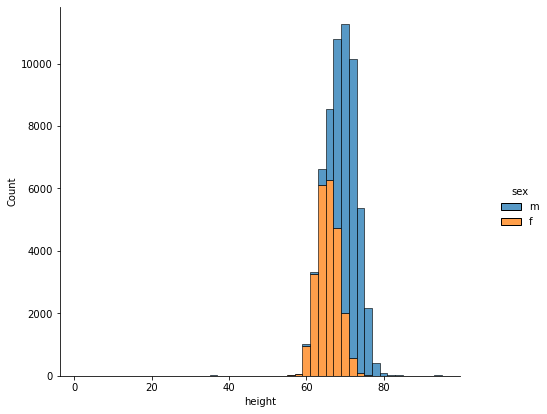

In [223]:
ax = sns.displot(data = cupid, x = 'height', binwidth = 2, hue = 'sex', multiple = 'stack')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)

Looks like the average heigh is around 70 inches. Lets see:

In [224]:
mean_height = np.mean(cupid.height)

print("Average height: {}".format(mean_height))

#per sex:
sex_avg_height = cupid.groupby("sex").height.mean()
#print(sex_avg_height)

print("Average height for females is {} inches while males is {}.".format(
    round(sex_avg_height[0], 2), round(sex_avg_height[1], 2)))

Average height: 68.29528051649066
Average height for females is 65.1 inches while males is 70.44.


#### Income

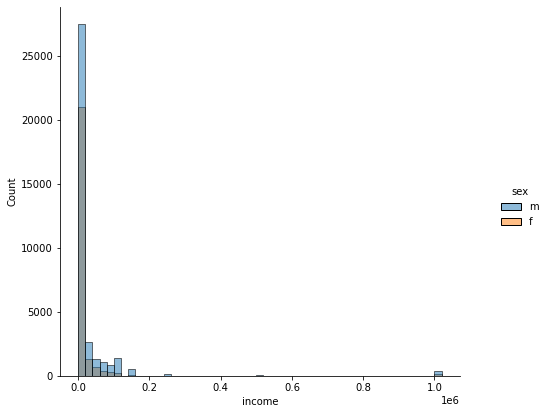

In [225]:
ax = sns.displot(data = cupid, x = 'income', binwidth = 20000, hue = 'sex')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)


In [232]:
#hard to see but can still see average income per sex:

mean_income = np.mean(cupid.income)

print("Average income: {}".format(round(mean_income, 2)))

#per sex:
sex_avg_income = cupid.groupby("sex").income.mean()
#print(sex_avg_height)

print("Average income for females is {} while males incomes is {}.".format(
    round(sex_avg_income[0], 2), round(sex_avg_income[1], 2)))


Average income: 20033.22
Average income for females is 11181.7 while males incomes is 25991.31.


__looks like female incomes are about half of male incomes...so I guess chivalry should be emphasized on dates?__

### Discreet/Categorical Variables:

We know from above the continuous variables are: __age__, __height__, and __income__

Now let's just look at some of the __discreet/categorical variables__

#### Sex:

<AxesSubplot:xlabel='sex', ylabel='count'>

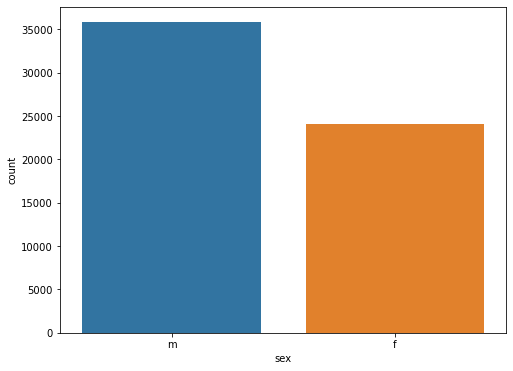

In [16]:
fig = plt.figure(figsize = (8,6))
sns.countplot(data = cupid, x = 'sex')

#### Body Type:

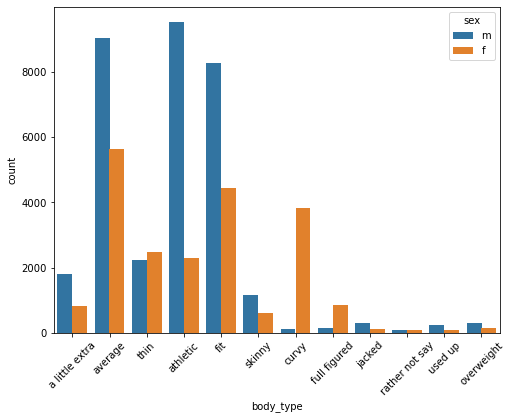

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(data = cupid, x = 'body_type', hue = 'sex')
plt.xticks(rotation = 45)
plt.show()


- Interesting to see how people label themselves
    - Most men are average, athletic, or fit
    - Most women are average, thin, athletic, fit, or curvy
    - The one that caught my eye is the difference in label between men and women for "a little extra" and "curvy" Men it seems tend to go with "a little extra" instead of using "curvy"

#### Diet

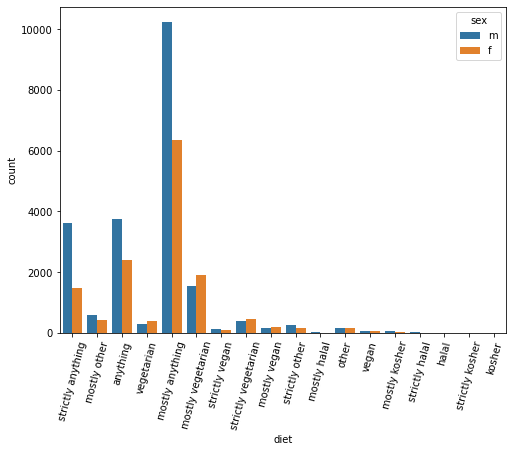

In [18]:
plt.figure(figsize = (8,6))
sns.countplot(data = cupid, x = 'diet', hue = 'sex')
plt.xticks(rotation = 75)
plt.show()


- also a lot of non-picky eaters. a large portion of the population seems to be eating anything.

#### Sign

<AxesSubplot:xlabel='sign', ylabel='count'>

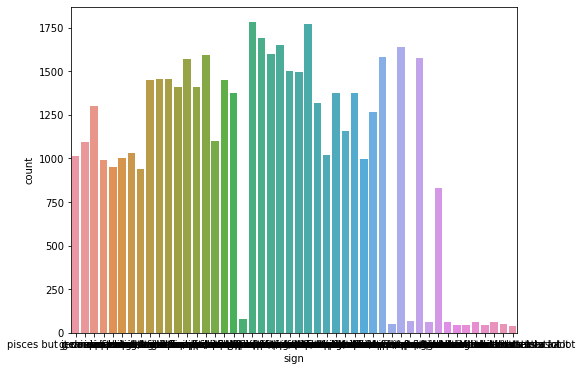

In [19]:
plt.figure(figsize = (8,6))
sns.countplot(data = cupid, x = 'sign')


Ok, so something is wrong here, lets check

In [236]:
print(cupid.sign.value_counts())

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
aquarius but it doesn&rsquo;t matter             1408
libra but it doesn&rsquo;t matter                1408
capricorn and it&rsquo;s fun

In [237]:
#ok lets separate values into a new column because the values we actually want are just the 
#[0] index of the string 


cupid['zodiac'] = cupid.sign.str.split(" ").str.get(0)

print(cupid.zodiac.value_counts())

###so in zodiac column we now have the signs with no issues...


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: zodiac, dtype: int64


In [241]:
#after looking at the other columns, tthe religion column stood out as well as needing some cleaning up

cupid['religion_clean'] = cupid.religion.str.split(" ").str.get(0)

print(cupid.religion_clean.value_counts())

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_clean, dtype: int64


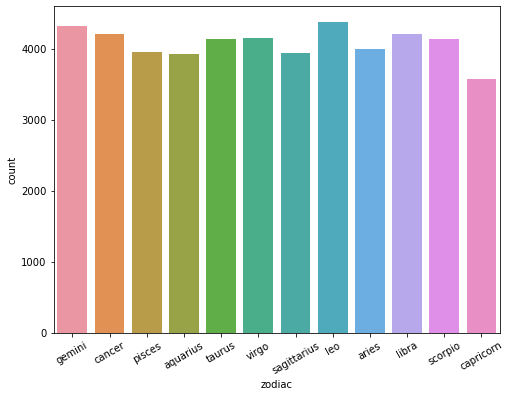

In [242]:
plt.figure(figsize = (8,6))
sns.countplot(data = cupid, x = 'zodiac')
plt.xticks(rotation = 30)
plt.show()

#much clearer now#

So we've seen some of the columns for what we want to work with, lets see if we can create some machine learning to predict if certain variables can predict others.

## Modeling / Machine Learning

OK, so let's think about what we can do here. We've got a bunch of dating profiles. We've got a bunch of info on the people in this dataset. one of the basic ones thats asked:

   - can we figure out a persons zodiac sign based off of other features?

Some people don't care for zodiac, some read their horoscopes daily. Let's look at a few variables and see what we can do

There's tons of models and machine learning algorithms out there, but for the purpose of this dataset and for practice, will look at:
   - Logistic Regression
   - KNeighbors Classification
   - Decision Tree Classification
 

In [243]:
cupid_new = cupid[['drinks', 'smokes', 'drugs', 'zodiac']]

In [244]:
cupid_new.head()

,drinks,smokes,drugs,zodiac
0,socially,sometimes,never,gemini
1,often,no,sometimes,cancer
2,socially,no,NaN,pisces
3,socially,no,NaN,pisces
4,socially,no,never,aquarius


- quick look we can see NaN values in the drugs column. We need to clean the data in order to put it through any machine learning algos, so lets start there

In [245]:
cupid_new_clean = cupid_new.dropna()

In [246]:
cupid_new_clean.head()

,drinks,smokes,drugs,zodiac
0,socially,sometimes,never,gemini
1,often,no,sometimes,cancer
4,socially,no,never,aquarius
7,socially,no,never,sagittarius
9,not at all,no,never,cancer


OK so everything is a string currently. we need to create dummies so that the categories can be integers, and the model can work correctly:

In [247]:
colums = ['drinks', 'smokes', 'drugs', 'zodiac']

for col in colums[:-1]:
    cupid_new_clean = pd.get_dummies(cupid_new_clean, columns = [col], prefix = [col])
    
cupid_new_clean.shape

(35570, 15)

In [248]:
cupid_new_clean.head()

,zodiac,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,drugs_never,drugs_often,drugs_sometimes
0,gemini,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,cancer,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,aquarius,0,0,0,0,1,0,1,0,0,0,0,1,0,0
7,sagittarius,0,0,0,0,1,0,1,0,0,0,0,1,0,0
9,cancer,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [127]:
cupid_new_clean.zodiac.value_counts()

leo            3160
gemini         3117
cancer         3076
virgo          3074
libra          3050
taurus         3024
scorpio        2992
aries          2925
aquarius       2851
sagittarius    2842
pisces         2814
capricorn      2645
Name: zodiac, dtype: int64

- So we've cleaned our data, and we've created dummy variables in order to create integers out of categorical values
- can now look to input these data points into machine learning algos

### Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [254]:
col_length = len(cupid_new_clean)

X = cupid_new_clean.iloc[:, 1:col_length]
Y = cupid_new_clean.iloc[:, 0:1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [255]:
lr_model = LogisticRegression(multi_class="multinomial")

lr_model.fit(X_train, Y_train)

lr_predictions = lr_model.predict(X_train)

In [256]:
print(classification_report(Y_train, lr_predictions))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    aquarius       0.00      0.00      0.00      2260
       aries       0.09      0.03      0.05      2298
      cancer       0.10      0.08      0.09      2452
   capricorn       0.00      0.00      0.00      2110
      gemini       0.09      0.54      0.15      2507
         leo       0.09      0.06      0.07      2523
       libra       0.09      0.05      0.06      2454
      pisces       0.00      0.00      0.00      2253
 sagittarius       0.00      0.00      0.00      2299
     scorpio       0.10      0.12      0.11      2394
      taurus       0.09      0.17      0.12      2485
       virgo       0.07      0.00      0.01      2421

    accuracy                           0.09     28456
   macro avg       0.06      0.09      0.05     28456
weighted avg       0.06      0.09      0.06     28456



- OK so...that is pretty horrible results. the F1 scores are mostly around or below .1 (meaning 10% accurately predicting our zodiac sign) which is saying our prediction model is pretty inaccurate. Lets try another.

### K-Nearest Neighbor

In [257]:
from sklearn.neighbors import KNeighborsClassifier

In [258]:
kneighbor = KNeighborsClassifier(n_neighbors = 5)

kneighbor.fit(X_train, Y_train)

kn_predictions = kneighbor.predict(X_train)

In [259]:
print(classification_report(Y_train, kn_predictions))

              precision    recall  f1-score   support

    aquarius       0.08      0.12      0.09      2260
       aries       0.08      0.55      0.14      2298
      cancer       0.11      0.02      0.03      2452
   capricorn       0.08      0.06      0.07      2110
      gemini       0.16      0.00      0.01      2507
         leo       0.10      0.11      0.10      2523
       libra       0.09      0.05      0.07      2454
      pisces       0.08      0.07      0.07      2253
 sagittarius       0.09      0.01      0.01      2299
     scorpio       0.14      0.01      0.02      2394
      taurus       0.27      0.00      0.00      2485
       virgo       0.10      0.02      0.03      2421

    accuracy                           0.08     28456
   macro avg       0.11      0.09      0.05     28456
weighted avg       0.12      0.08      0.05     28456



- Oh boy, still bad. F1 scores are in the .05 range...half as good as our LR model.

### Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
tree = DecisionTreeClassifier()

tree.fit(X_train, Y_train)

tree_predictions = tree.predict(X_train)

In [194]:
print(classification_report(Y_train, tree_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.02      0.04      2260
       aries       0.11      0.06      0.07      2298
      cancer       0.11      0.14      0.12      2452
   capricorn       0.17      0.01      0.02      2110
      gemini       0.11      0.06      0.08      2507
         leo       0.09      0.55      0.16      2523
       libra       0.14      0.03      0.05      2454
      pisces       0.13      0.02      0.03      2253
 sagittarius       0.15      0.00      0.01      2299
     scorpio       0.10      0.12      0.11      2394
      taurus       0.12      0.03      0.05      2485
       virgo       0.11      0.10      0.10      2421

    accuracy                           0.10     28456
   macro avg       0.12      0.10      0.07     28456
weighted avg       0.12      0.10      0.07     28456



- still no good. F1 score of around .06...our model sucks at predicting zodiacs based off of drinking, smoking, and drug use. 

### 3-Parameter model

3 parameters was horrible. Lets see if we can change the columns, get new parameters, and run it back

In [176]:
new_cupid = cupid[['body_type', 'diet', 'orientation', 'pets', 'sex', 'religion_clean', 'job', 'zodiac']]

new_cupid_clean = new_cupid.dropna()

new_cupid_clean.shape

(16453, 8)

In [177]:
columz = ['body_type', 'diet', 'orientation', 'pets', 'sex', 'religion_clean', 'job', 'zodiac']

for col in columz[:-1]:
    new_cupid_clean = pd.get_dummies(new_cupid_clean, columns = [col], prefix = [col])

new_cupid_clean.head()



,zodiac,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [178]:
new_col_len = len(new_cupid_clean)

X_new = new_cupid_clean.iloc[:, 1:new_col_len]
Y_new = new_cupid_clean.iloc[:, 0:1]

X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new, test_size = 0.20, random_state = 0)

Y_new_train = Y_new_train.to_numpy().ravel()
Y_new_test = Y_new_test.to_numpy().ravel()

### K-Neighbor

In [200]:
kneighbor_new = KNeighborsClassifier(n_neighbors = 5)

kneighbor_new.fit(X_new_train, Y_new_train)

kn_predictions_new = kneighbor_new.predict(X_new_train)

In [196]:
print(classification_report(Y_new_train, kn_predictions_new))

              precision    recall  f1-score   support

    aquarius       0.27      0.66      0.39      1031
       aries       0.27      0.54      0.36      1043
      cancer       0.29      0.45      0.35      1190
   capricorn       0.33      0.36      0.34       952
      gemini       0.37      0.34      0.36      1200
         leo       0.37      0.27      0.31      1208
       libra       0.40      0.24      0.30      1090
      pisces       0.41      0.24      0.30      1059
 sagittarius       0.41      0.20      0.27      1051
     scorpio       0.40      0.20      0.27      1072
      taurus       0.45      0.24      0.32      1102
       virgo       0.39      0.28      0.32      1164

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.36      0.33      0.32     13162



- OK now we're in business. The additional parameters has given us a score of 0.33 (about 33% accurately predicting a persons Zodiac sign based off of the inputs above)

### Tree Classifier

In [197]:
tree_new = DecisionTreeClassifier()

tree_new.fit(X_new_train, Y_new_train)

tree_new_predictions = tree_new.predict(X_new_train)

In [198]:
print(classification_report(Y_new_train, tree_new_predictions))

              precision    recall  f1-score   support

    aquarius       0.66      0.94      0.78      1031
       aries       0.66      0.87      0.75      1043
      cancer       0.69      0.85      0.77      1190
   capricorn       0.74      0.83      0.78       952
      gemini       0.78      0.79      0.78      1200
         leo       0.79      0.80      0.79      1208
       libra       0.78      0.76      0.77      1090
      pisces       0.82      0.73      0.77      1059
 sagittarius       0.91      0.69      0.78      1051
     scorpio       0.87      0.71      0.78      1072
      taurus       0.92      0.70      0.79      1102
       virgo       0.91      0.67      0.77      1164

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.78     13162
weighted avg       0.80      0.78      0.78     13162



- Even better! So adding more parameters has increased our likelyhood of predicting Zodiac sign based off other parameters in the description like body type, diet, orientation, pets, sex, job, and religion. F1 score of .78 is signficantly better than our 3 parameter model off of drinking, smoking, and drugs (meaning its about 78% accurate).

#### Heatmap Using Our Decision Tree Model

In [201]:
from sklearn.metrics import confusion_matrix

In [203]:
cm = confusion_matrix(Y_new_train, tree_new_predictions)
cm_labels = tree_new.classes_

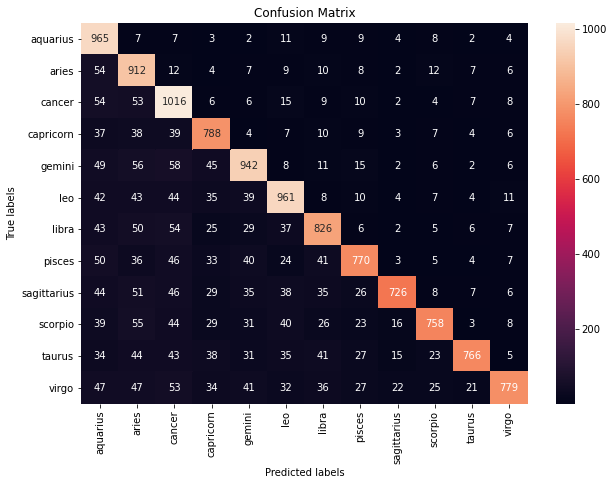

In [209]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_ticklabels(cm_labels); 
ax.yaxis.set_ticklabels(cm_labels);

- Pretty cool, so it predicted cancer, leo, and aquarius most accurately and was least accurate on scorpio, sagittarius, and taurus. 